In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('ford.csv')
df.head(100)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
95,Fiesta,2016,8495,Manual,24410,Petrol,125,54.3,1.2
96,Fiesta,2019,13895,Manual,13600,Petrol,145,58.9,1.0
97,Focus,2018,18298,Manual,21456,Diesel,145,67.3,2.0
98,Focus,2015,9198,Manual,31512,Diesel,0,74.3,1.5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [13]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [14]:
df.nunique()

model              24
year               23
price            3511
transmission        3
mileage         13528
fuelType            5
tax                36
mpg                90
engineSize         16
dtype: int64

In [15]:
df.value_counts()

model   year  price  transmission  mileage  fuelType  tax  mpg   engineSize
Mondeo  2020  22000  Manual        10       Diesel    145  65.7  2.0           4
Fiesta  2019  13500  Manual        6        Petrol    145  48.7  1.1           3
              14995  Manual        15       Petrol    145  58.9  1.0           3
              13130  Manual        151      Petrol    145  48.7  1.1           3
Focus   2019  14998  Manual        7000     Petrol    145  58.9  1.0           3
                                                                              ..
B-MAX   2013  5489   Manual        51882    Petrol    145  47.1  1.4           1
              5491   Manual        43036    Petrol    30   55.4  1.0           1
              5495   Manual        62774    Petrol    150  47.1  1.4           1
                     Semi-Auto     52209    Petrol    160  44.1  1.6           1
        2012  6000   Manual        63750    Petrol    30   55.4  1.0           1
Name: count, Length: 17812, dtype

In [16]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [19]:
df.duplicated().sum()

np.int64(154)

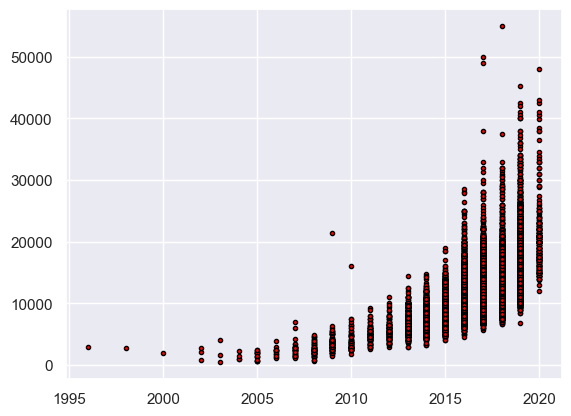

In [43]:
x = df['year']
y = df['price']

plt.scatter(x, y, c='red', marker='.', edgecolors='black')
plt.show()

In [35]:
df.loc[df["year"] == 2060]
df.drop([17726], inplace=True)


In [42]:
df.iloc[17725]

model            EcoSport
year                 2017
price               11000
transmission    Automatic
mileage             11809
fuelType           Petrol
tax                   160
mpg                  44.8
engineSize            1.5
Name: 17725, dtype: object

In [34]:
df.loc[(df["mpg"] > 85) & (df["fuelType"] != "Hybrid")]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
744,Fiesta,2016,7498,Manual,41271,Diesel,0,88.3,1.5
993,Fiesta,2016,7000,Manual,65000,Diesel,0,88.3,1.5
1031,Fiesta,2018,13495,Manual,14000,Diesel,145,88.3,1.5
1122,Fiesta,2016,8498,Manual,39271,Diesel,0,88.3,1.5
1683,Fiesta,2018,8991,Manual,30500,Diesel,145,88.3,1.5
...,...,...,...,...,...,...,...,...,...
16961,Fiesta,2018,10600,Manual,14861,Diesel,145,88.3,1.5
17043,Fiesta,2017,6795,Manual,65290,Diesel,0,88.3,1.5
17365,Fiesta,2017,6995,Manual,17000,Diesel,145,85.6,1.5
17510,Fiesta,2018,9100,Manual,55717,Diesel,145,88.3,1.5


In [ ]:
df.plot()

In [36]:
df.iloc[17726]

model            Focus
year              2017
price            12500
transmission    Manual
mileage          20668
fuelType        Petrol
tax                 20
mpg               61.4
engineSize         1.0
Name: 17727, dtype: object

In [53]:
type_stats = df.groupby('model').agg({"price":['mean', 'median'], "mileage":['mean'], "year":['min', 'max']}) 

type_stats.round(1).sort_values(("price", 'mean'), ascending=False)

price           mileage  year      
                           mean   median     mean   min   max
model                                                        
 Mustang                34631.3  33979.0   9480.1  2016  2020
 Edge                   22810.5  20987.0  21769.5  2016  2019
 Puma                   21447.2  21497.5   3839.9  2002  2020
 Tourneo Custom         21166.0  20000.0  21791.3  2015  2019
 Galaxy                 17841.9  18000.0  32995.0  2005  2019
 S-MAX                  17720.2  17297.0  31896.3  2006  2020
 Kuga                   15823.5  15980.0  23707.5  2009  2020
 Grand Tourneo Connect  14874.9  14000.0  23602.4  2014  2020
 Ranger                 14495.0  14495.0  88000.0  2013  2013
 Tourneo Connect        13805.8  12998.0  24458.3  2015  2020
 Focus                  13185.9  12790.0  23735.3  2003  2020
 EcoSport               12499.3  12200.0  16469.8  2014  2020
 Transit Tourneo        12450.0  12450.0  19496.0  2014  2014
 Mondeo                 12305.7  11544.5  45834.7  2002  2020
 Grand C-MAX            10881.6  10798.0  27882.7  2011  2019
 Fiesta                 10196.9   9995.0  21679.1  1998  2020
 C-MAX                   9914.6  10000.0  28457.0  2006  2019
 Ka+                     8707.9   8300.0  11602.3  2016  2020
Focus                    8299.0   8299.0   5007.0  2015  2015
 B-MAX                   8287.5   8300.0  28131.7  2012  2018
 KA                      5186.1   4800.0  35604.6  2006  2019
 Escort                  3000.0   3000.0  50000.0  1996  1996
 Fusion                  2555.8   2443.0  65888.8  2004  2011
 Streetka                1924.5   1924.5  68527.5  2005  2006

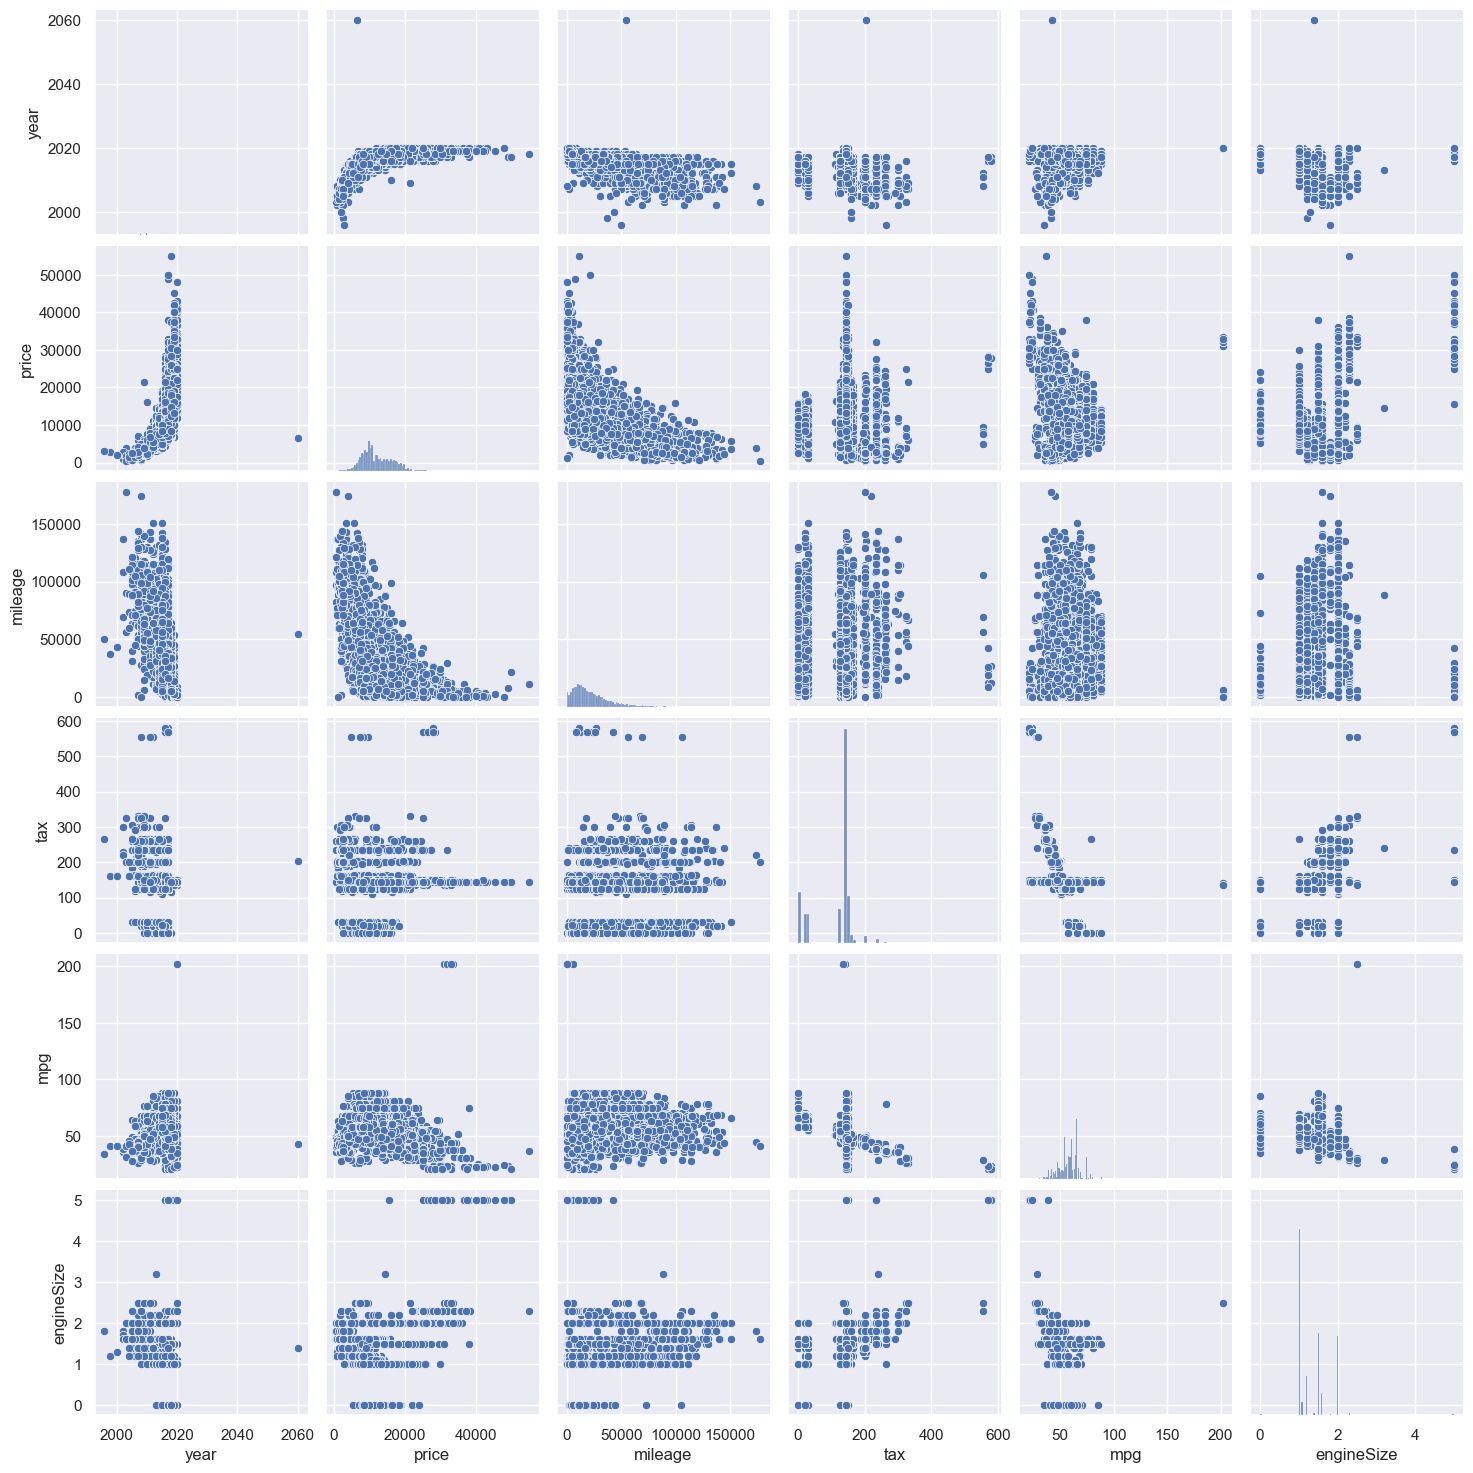

In [9]:
sns.set_theme()

sns.pairplot(df)